# Techniques of handling missing values

##### 1) Mean / Median / Mode Imputation
##### 2) Random Sample Imputation
##### 3) Capturing Nan values with a New feature
##### 4) End of Distribution Imputation
##### 5) Arbitary Imputation
##### 6) Frequent Categories Imputation

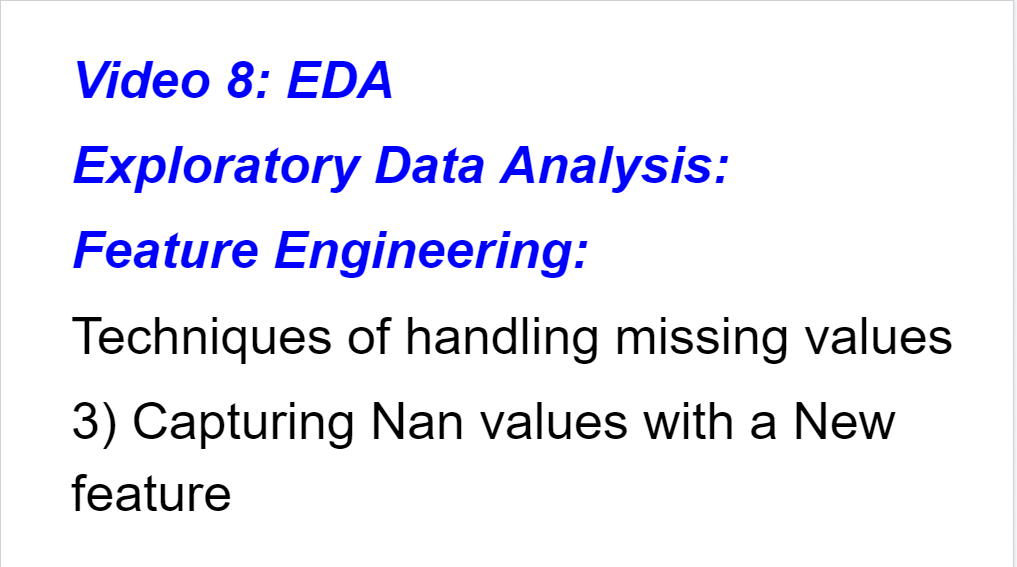

# 3) Capturing Nan values with a New feature

This technique works well,
when data is Missing Not at Random (MNAR)

In [14]:
import pandas as pd
#Read Titanic Training Data Set
df = pd.read_csv('C:/Users/Kapil Wanaskar/Data Sets/titanic_train (1).csv')
df

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,158,1,"Hipkins, Mr. William Edward",male,55.0,0,0,680,50.0000,C39,S,NaN,NaN,London / Birmingham,0
846,174,1,"Kent, Mr. Edward Austin",male,58.0,0,0,11771,29.7000,B37,C,NaN,258.0,"Buffalo, NY",0
847,467,2,"Kantor, Mrs. Sinai (Miriam Sternin)",female,24.0,1,0,244367,26.0000,NaN,S,12,NaN,"Moscow / Bronx, NY",1
848,1112,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S,NaN,NaN,NaN,0


In [15]:
#focusing on only 3 columns
df = pd.read_csv('C:/Users/Kapil Wanaskar/Data Sets/titanic_train (1).csv', usecols=['age','fare','survived'])
df.head() # reading only top 5 rows

,age,fare,survived
0,NaN,7.7333,1
1,38.0,8.6625,0
2,30.0,24.1500,0
3,54.0,23.0000,1
4,40.0,13.0000,0


In [16]:
import numpy as np
df['age_NaN'] = np.where(df['age'].isnull(),1,0) #if value is null then insert 1 orelse zero '0'
df

,age,fare,survived,age_NaN
0,NaN,7.7333,1,1
1,38.0,8.6625,0,0
2,30.0,24.1500,0,0
3,54.0,23.0000,1,0
4,40.0,13.0000,0,0
...,...,...,...,...
845,55.0,50.0000,0,0
846,58.0,29.7000,0,0
847,24.0,26.0000,1,0
848,3.0,13.7750,0,0


# Advantages
1) Easy to implement

2) Captures the importance of missing values by placing 1 at Nan

In [17]:
df1 = df.age.median()
int(df1)

28

In [19]:
df['age'].fillna(int(df1))

0      28.0
1      38.0
2      30.0
3      54.0
4      40.0
       ... 
845    55.0
846    58.0
847    24.0
848     3.0
849    52.0
Name: age, Length: 850, dtype: float64

In [26]:
df['age'].fillna(int(df1),inplace=True) #permanent replacement of Nan value with Median
df.head(20) # 1 is tell the ML model there was Nan value in that row of Age column

,age,fare,survived,age_NaN
0,28.0,7.7333,1,1
1,38.0,8.6625,0,0
2,30.0,24.1500,0,0
3,54.0,23.0000,1,0
4,40.0,13.0000,0,0
5,28.0,22.5250,0,0
6,19.0,0.0000,0,0
7,30.0,13.0000,1,0
8,22.0,7.7750,1,0
9,21.0,9.8250,0,0


# Dis-Advantage
1) Creating One Additional feature for each Feature with Nan Value, leading to Curse of dimensionality

Imagine 200 new / extra features for 200 old features :O